In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Collection

In [2]:
# Study the dataset:

df = pd.read_csv('financial_loan.csv')
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [3]:
# To Displays the columns:

df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [4]:
# Gets General information about the data:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [5]:
# Basic Statistics view of numerical value:

df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


# Step 2: Data Cleaning

In [6]:
# Gets General information about the data before handling:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [7]:
# Checking for null values before handling:

df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

 - It indicates that there are emp_title have a 1438 is missing.

<Axes: >

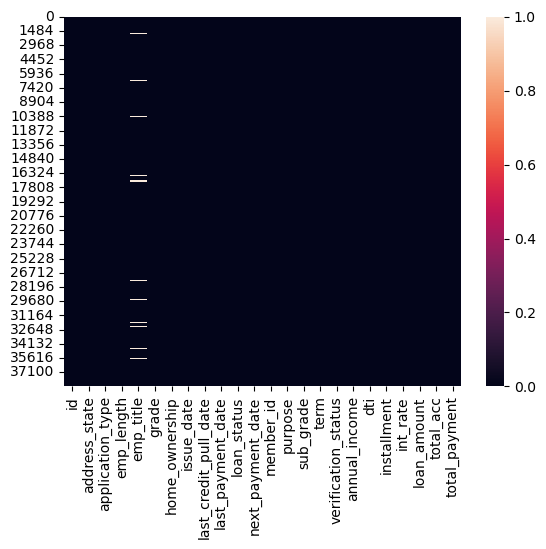

In [8]:
# Heatmap before handling:

sns.heatmap(df.isnull())

In [9]:
# Checking the duplicate records:

df.duplicated().sum()

np.int64(0)

In [10]:
# Creating the Data Dictionary with first column being datatype:

Data_dict = pd.DataFrame(df.dtypes)
Data_dict

,0
id,int64
address_state,object
application_type,object
emp_length,object
emp_title,object
grade,object
home_ownership,object
issue_date,object
last_credit_pull_date,object
last_payment_date,object


In [11]:
# identifying the missing values from the dataset:

Data_dict['MissingVal'] = df.isnull().sum()
Data_dict

,0,MissingVal
id,int64,0
address_state,object,0
application_type,object,0
emp_length,object,0
emp_title,object,1438
grade,object,0
home_ownership,object,0
issue_date,object,0
last_credit_pull_date,object,0
last_payment_date,object,0


In [12]:
# Handling missing value:

print("Handling missing values...")
for col in df.select_dtypes(include=['number']).columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in numerical column '{col}' with median ({median_val}).")
            
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in categorical column '{col}' with mode ('{mode_val}').")

Handling missing values...
Filled missing values in categorical column 'emp_title' with mode ('US Army').


In [13]:
# Basic Statistics view of numerical value:

df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


In [14]:
# To see the categorical statistic:

df.describe(include='O')

,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,purpose,sub_grade,term,verification_status
count,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576
unique,50,1,11,28525,7,5,65,107,102,3,102,14,35,2,3
top,CA,INDIVIDUAL,10+ years,US Army,B,RENT,11-12-2021,16-05-2021,16-05-2021,Fully Paid,16-06-2021,Debt consolidation,B3,36 months,Not Verified
freq,6894,38576,8870,1573,11674,18439,2188,10041,1209,32145,1209,18214,2834,28237,16464


In [15]:
# Checking missing values after handling:

df.isnull().sum()

id                       0
address_state            0
application_type         0
emp_length               0
emp_title                0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
member_id                0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_acc                0
total_payment            0
dtype: int64

<Axes: >

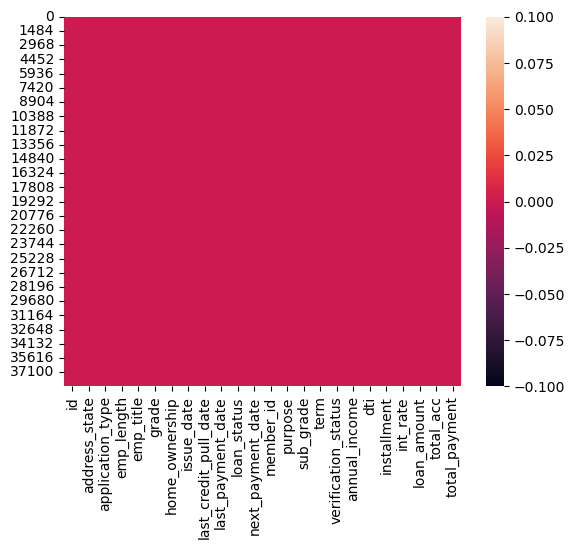

In [16]:
# Heatmap after handling:

sns.heatmap(df.isnull())

- A heatmap is a visual representation of data where different values are shown using colors. It helps in identifying patterns, correlations, and missing values in a dataset.

# Step 3: Handling Outliers

In [17]:
# List of numerical variables:

numerical_features = [feature for feature in df.columns if df[feature].dtypes !='O']
print('Number of numerical variables:', len(numerical_features))

Number of numerical variables: 9


In [18]:
# List of numerical variables:

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Numerical variable names:', numerical_features)

Numerical variable names: ['id', 'member_id', 'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']


In [19]:
# Obsereve the numerical variables:

cols = ['id', 'member_id', 'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']
cols

['id',
 'member_id',
 'annual_income',
 'dti',
 'installment',
 'int_rate',
 'loan_amount',
 'total_acc',
 'total_payment']

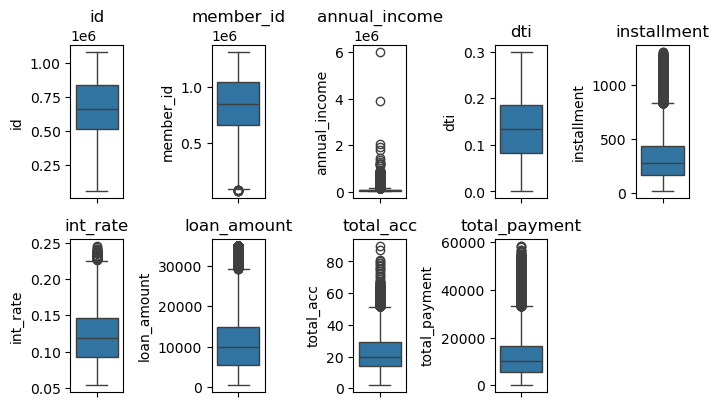

In [20]:
# checking the outliers:

plt.figure(figsize=(7, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

## Before Handling Outliers:

In [21]:
# Columns to check for outliers
outlier_columns = ['id', 'member_id', 'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']

# Loop through each column and check for outliers
for col in outlier_columns:
    print(f"\nChecking for outliers in '{col}'...\n")

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Compute lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Lower bound for {col}: {lower_bound}")
    print(f"Upper bound for {col}: {upper_bound}")

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")


Checking for outliers in 'id'...

Lower bound for id: 29033.5
Upper bound for id: 1320989.5
Number of outliers in id: 0

Checking for outliers in 'member_id'...

Lower bound for member_id: 88968.125
Upper bound for member_id: 1619663.125
Number of outliers in member_id: 9

Checking for outliers in 'annual_income'...

Lower bound for annual_income: -21050.75
Upper bound for annual_income: 145751.25
Number of outliers in annual_income: 1824

Checking for outliers in 'dti'...

Lower bound for dti: -0.0736
Upper bound for dti: 0.3416
Number of outliers in dti: 0

Checking for outliers in 'installment'...

Lower bound for installment: -230.53875
Upper bound for installment: 833.43125
Number of outliers in installment: 1150

Checking for outliers in 'int_rate'...

Lower bound for int_rate: 0.01415000000000001
Upper bound for int_rate: 0.22494999999999998
Number of outliers in int_rate: 78

Checking for outliers in 'loan_amount'...

Lower bound for loan_amount: -8750.0
Upper bound for loan_a

- 'id' is having 0 Outliers
- 'member_id' is having 9 Outliers 
- 'annual_income' is having 1824 Outliers 
- 'dti' is having 0 Outliers
- 'installment' is having 1150 Outliers 
- 'int_rate' is having 78 Outliers 
- 'loan_amount' is having 1208 Outliers 
- 'total_acc' is having 692 Outliers 
- 'total_payment' is having 1277 Outliers 

### These are the Outliers of this dataset. 

## After Handling Outliers:

In [22]:
def cap_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[feature] = df[feature].clip(lower_bound, upper_bound)
    return df

df_capped = cap_outliers(df, numerical_features)


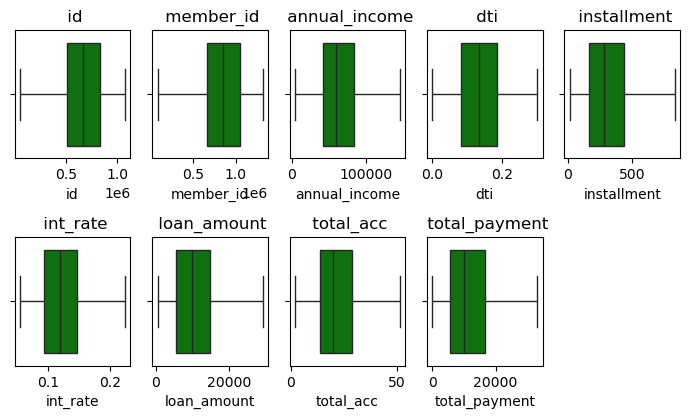

In [23]:
# Columns to plot
columns = ['id', 'member_id', 'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']

plt.figure(figsize=(7, 8))  # Adjust figure size
windnum = 1

# Loop through selected columns
for i in columns:
    plt.subplot(4, 5, windnum)  # Adjust grid if needed
    sns.boxplot(x=df[i], color='green')  # Use x=df[i] for true horizontal boxplot
    plt.title(f' {i}')  # Add title for clarity
    windnum += 1

plt.tight_layout()
plt.show()

In [24]:
# Columns to check for outliers
outlier_columns = ['id', 'member_id', 'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']

# Loop through each column and check for outliers
for col in outlier_columns:
    print(f"\nChecking for outliers in '{col}'...\n")

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Compute lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Lower bound for {col}: {lower_bound}")
    print(f"Upper bound for {col}: {upper_bound}")

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")


Checking for outliers in 'id'...

Lower bound for id: 29033.5
Upper bound for id: 1320989.5
Number of outliers in id: 0

Checking for outliers in 'member_id'...

Lower bound for member_id: 88968.125
Upper bound for member_id: 1619663.125
Number of outliers in member_id: 0

Checking for outliers in 'annual_income'...

Lower bound for annual_income: -21050.75
Upper bound for annual_income: 145751.25
Number of outliers in annual_income: 0

Checking for outliers in 'dti'...

Lower bound for dti: -0.0736
Upper bound for dti: 0.3416
Number of outliers in dti: 0

Checking for outliers in 'installment'...

Lower bound for installment: -230.53875
Upper bound for installment: 833.43125
Number of outliers in installment: 0

Checking for outliers in 'int_rate'...

Lower bound for int_rate: 0.01415000000000001
Upper bound for int_rate: 0.22494999999999998
Number of outliers in int_rate: 0

Checking for outliers in 'loan_amount'...

Lower bound for loan_amount: -8750.0
Upper bound for loan_amount: 

- 'id' is having 0 Outliers as been cleared now 0 Outliers
- 'member_id' is having 9 Outliers as been cleared now 0 Outliers
- 'annual_income' is having 1824 Outliers as been cleared now 0 Outliers
- 'dti' is having 0 Outliers as been cleared now 0 Outliers
- 'installment' is having 1150 Outliers as been cleared now 0 Outliers
- 'int_rate' is having 78 Outliers as been cleared now 0 Outliers
- 'loan_amount' is having 1208 Outliers as been cleared now 0 Outliers
- 'total_acc' is having 692 Outliers as been cleared now 0 Outliers
- 'total_payment' is having 1277 Outliers as been cleared now 0 Outliers

### Now, there are no outliers in this bankmarketing dataset.

In [25]:
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.00,0.0100,59.83,0.1527,2500,4.0,1009.0
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.00,0.0535,109.43,0.1864,3000,4.0,3939.0
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.00,0.2088,421.65,0.1596,12000,11.0,3522.0
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.00,0.0540,97.06,0.1065,4500,9.0,4911.0
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.00,0.0231,106.53,0.0603,3500,28.0,3835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.00,0.1986,551.64,0.1299,24250,33.0,31946.0
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.00,0.0458,579.72,0.1349,25200,18.0,31870.0
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.00,0.1734,627.93,0.1749,25000,20.0,33195.5
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,145751.25,0.0009,612.72,0.1825,24000,9.0,33195.5


In [26]:
df.shape

(38576, 24)

- Now, it's a cleaned financial loan dataset.

## Step 4: Data Visualizations

## Univariate Analysis:

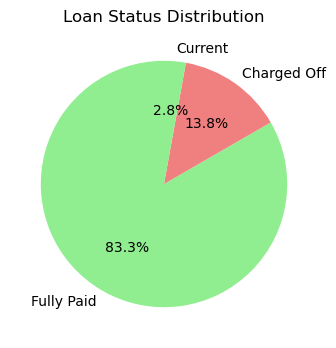

In [27]:
# Plot 1: Loan Status Distribution:

plt.figure(figsize=(5, 4))
loan_status_counts = df['loan_status'].value_counts()
plt.pie(loan_status_counts.values, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Loan Status Distribution')
plt.show()

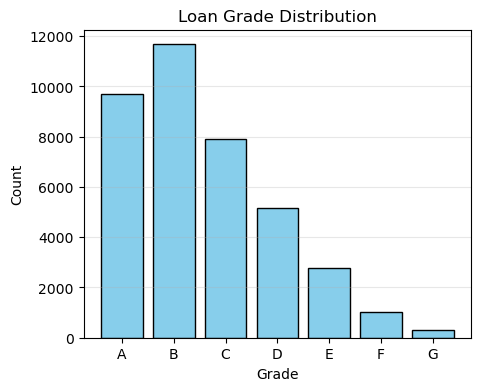

In [28]:
# Plot 2: Grade Distribution:

plt.figure(figsize=(5, 4))
grade_counts = df['grade'].value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values, color='skyblue', edgecolor='black')
plt.title('Loan Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

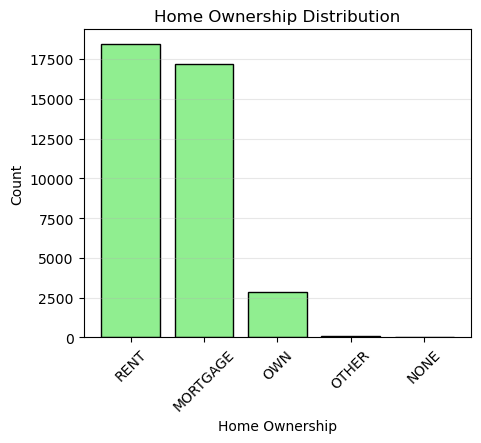

In [29]:
# Plot 3: Home Ownership Distribution:

plt.figure(figsize=(5, 4))
home_ownership_counts = df['home_ownership'].value_counts()
plt.bar(home_ownership_counts.index, home_ownership_counts.values, color='lightgreen', edgecolor='black')
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

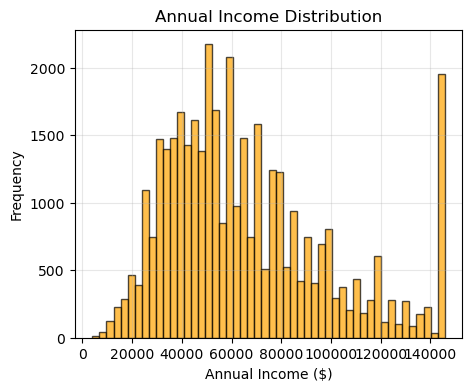

In [30]:
# Plot 4: Annual Income Distribution:

plt.figure(figsize=(5, 4))
plt.hist(df['annual_income'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

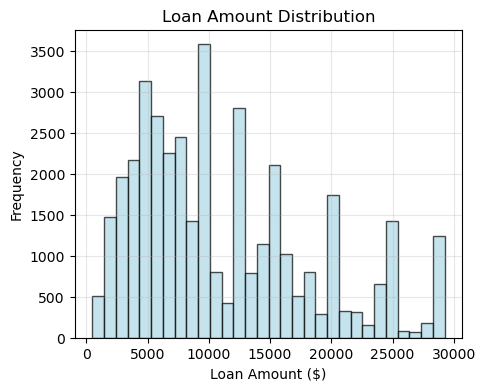

In [31]:
# Plot 5: Loan Amount Distribution:

plt.figure(figsize=(5, 4))
plt.hist(df['loan_amount'], bins=30, edgecolor='black', alpha=0.7, color='lightblue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

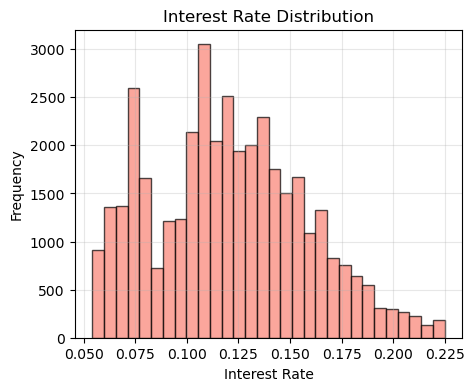

In [32]:
# Plot 6: Interest Rate Distribution:

plt.figure(figsize=(5, 4))
plt.hist(df['int_rate'], bins=30, edgecolor='black', alpha=0.7, color='salmon')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

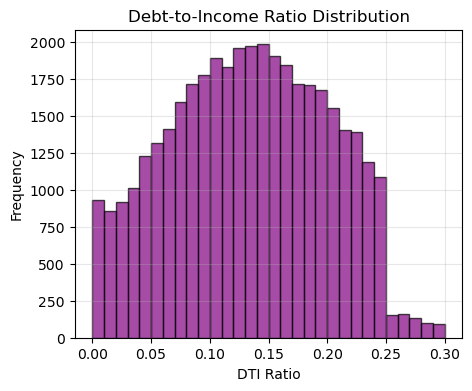

In [33]:
# Plot 7: DTI Distribution:

plt.figure(figsize=(5, 4))
plt.hist(df['dti'], bins=30, edgecolor='black', alpha=0.7, color='purple')
plt.title('Debt-to-Income Ratio Distribution')
plt.xlabel('DTI Ratio')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

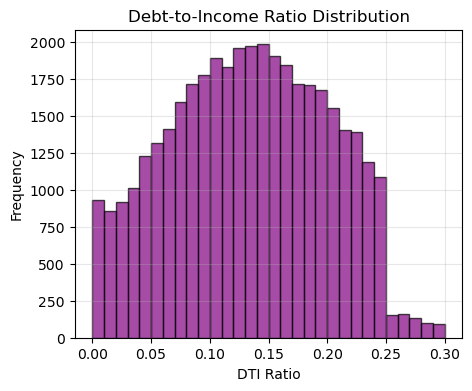

In [34]:
# Plot 7: DTI Distribution:

plt.figure(figsize=(5, 4))
plt.hist(df['dti'], bins=30, edgecolor='black', alpha=0.7, color='purple')
plt.title('Debt-to-Income Ratio Distribution')
plt.xlabel('DTI Ratio')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

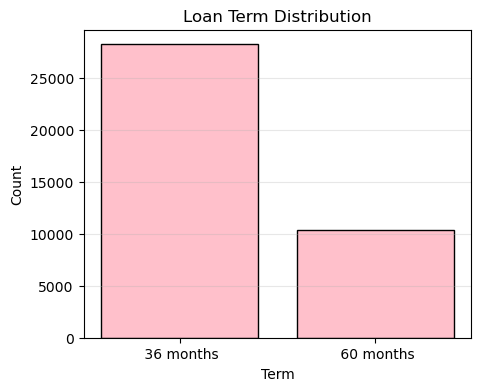

In [35]:
# Plot 9: Term Distribution:

plt.figure(figsize=(5, 4))
term_counts = df['term'].value_counts()
plt.bar(term_counts.index, term_counts.values, color='pink', edgecolor='black')
plt.title('Loan Term Distribution')
plt.xlabel('Term')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

## Bivariate Analysis:

<Figure size 500x400 with 0 Axes>

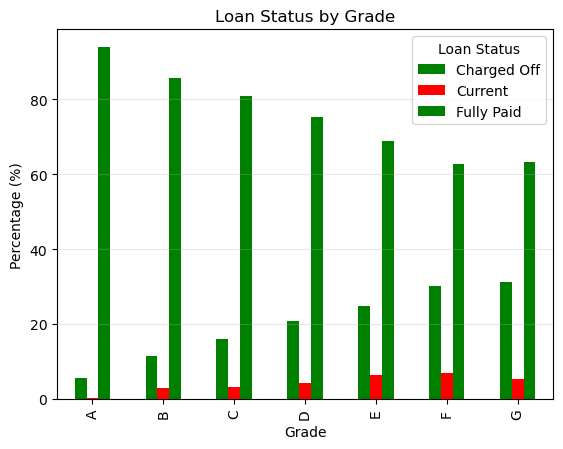

In [36]:
# Plot 1: Loan Status by Grade:

plt.figure(figsize=(5, 4))
status_by_grade = pd.crosstab(df['grade'], df['loan_status'], normalize='index') * 100
status_by_grade.plot(kind='bar', color=['green', 'red'])
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Percentage (%)')
plt.legend(title='Loan Status')
plt.grid(axis='y', alpha=0.3)
plt.show()

<Figure size 500x400 with 0 Axes>

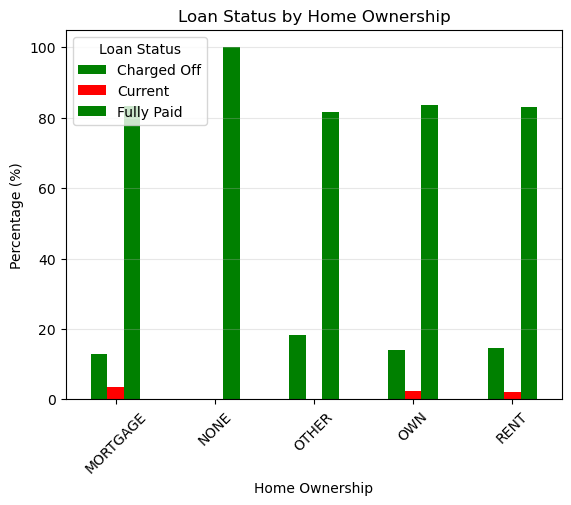

In [37]:
# Plot 2: Loan Status by Home Ownership:

plt.figure(figsize=(5, 4))
status_by_home = pd.crosstab(df['home_ownership'], df['loan_status'], normalize='index') * 100
status_by_home.plot(kind='bar', color=['green', 'red'])
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage (%)')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

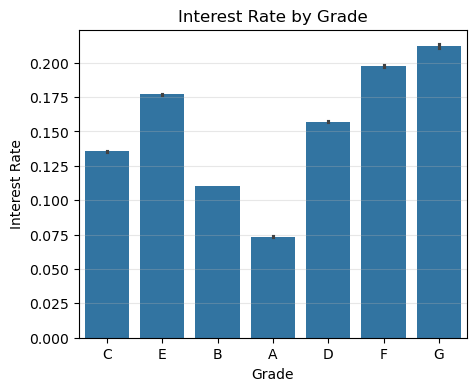

In [38]:
# Plot 3: Interest Rate by Grade:

plt.figure(figsize=(5, 4))
sns.barplot(data=df, x='grade', y='int_rate')
plt.title('Interest Rate by Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.grid(axis='y', alpha=0.3)
plt.show()

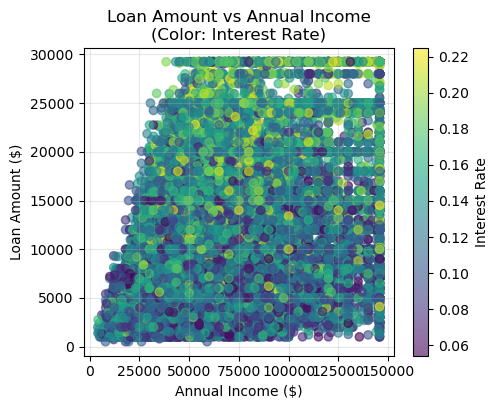

In [39]:
# Plot 4: Loan Amount vs Annual Income:

plt.figure(figsize=(5, 4))
scatter = plt.scatter(df['annual_income'], df['loan_amount'], alpha=0.6, 
                     c=df['int_rate'], cmap='viridis')
plt.colorbar(scatter, label='Interest Rate')
plt.title('Loan Amount vs Annual Income\n(Color: Interest Rate)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Amount ($)')
plt.grid(alpha=0.3)
plt.show()

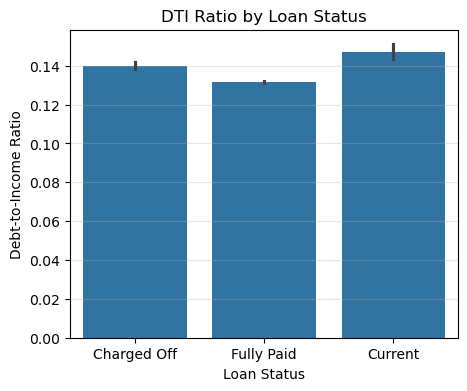

In [40]:
# Plot 5: DTI by Loan Status:

plt.figure(figsize=(5, 4))
sns.barplot(data=df, x='loan_status', y='dti')
plt.title('DTI Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.grid(axis='y', alpha=0.3)
plt.show()

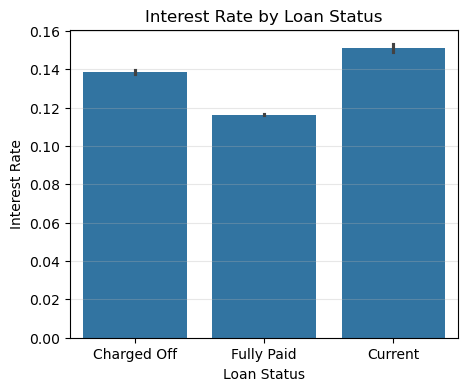

In [41]:
# Plot 6: Interest Rate by Loan Status:

plt.figure(figsize=(5, 4))
sns.barplot(data=df, x='loan_status', y='int_rate')
plt.title('Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.grid(axis='y', alpha=0.3)
plt.show()

<Figure size 500x400 with 0 Axes>

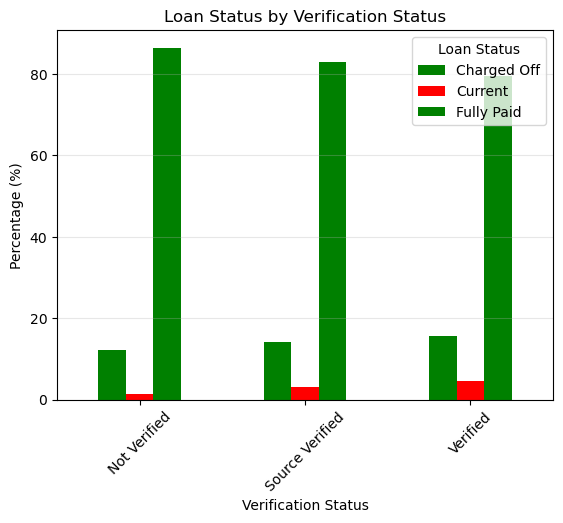

In [42]:
# Plot 7: Loan Status by Verification Status:

plt.figure(figsize=(5, 4))
status_by_verification = pd.crosstab(df['verification_status'], df['loan_status'], normalize='index') * 100
status_by_verification.plot(kind='bar', color=['green', 'red'])
plt.title('Loan Status by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Percentage (%)')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

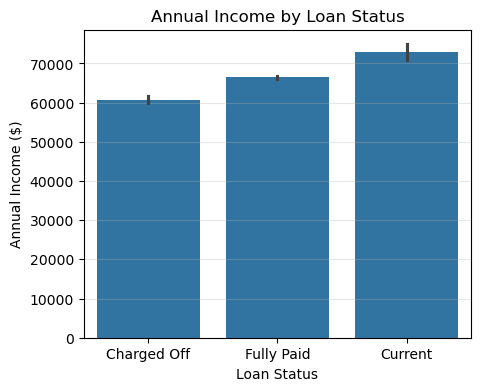

In [43]:
# Plot 8: Annual Income by Loan Status:

plt.figure(figsize=(5, 4))
sns.barplot(data=df, x='loan_status', y='annual_income')
plt.title('Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()

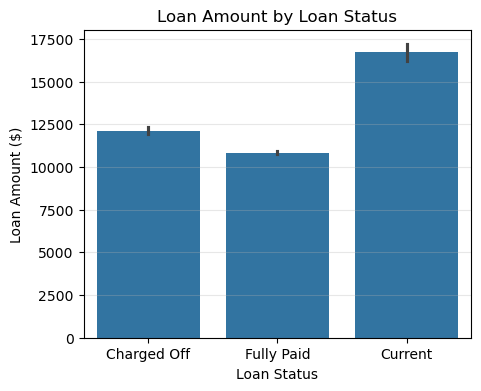

In [44]:
# Plot 9: Loan Amount by Loan Status:

plt.figure(figsize=(5, 4))
sns.barplot(data=df, x='loan_status', y='loan_amount')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()

## Multivariate Analysis:

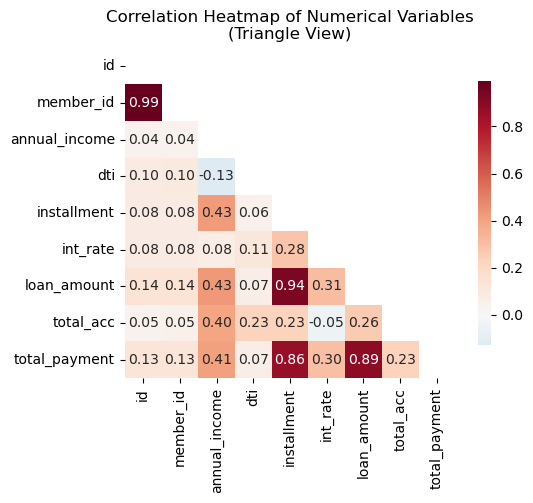

In [45]:
# Plot 1: Correlation Heatmap:

plt.figure(figsize=(6, 5))
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Variables\n(Triangle View)')
plt.tight_layout()
plt.show()

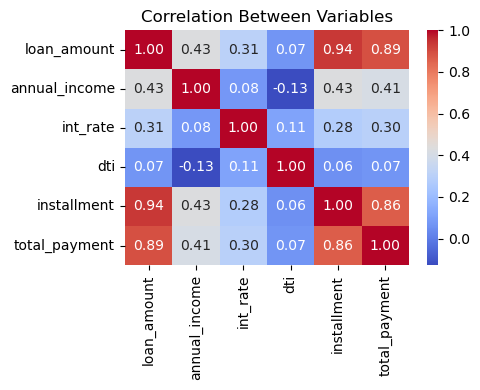

In [46]:
# 2. Pairplot for key variables (sample for speed):

plt.figure(figsize=(5, 4))

# Select only numerical columns
numerical_cols = ['loan_amount', 'annual_income', 'int_rate', 'dti', 'installment', 'total_payment']
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Variables')
plt.tight_layout()
plt.show()

<Figure size 500x400 with 0 Axes>

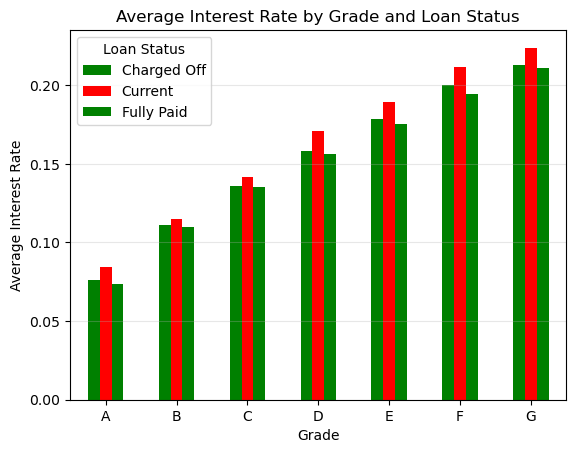

In [47]:
# Plot 3: SIMPLE - Grouped Bar Chart for Interest Rate by Grade and Loan Status:

plt.figure(figsize=(5, 4))

# Calculate average interest rates
result = df.groupby(['grade', 'loan_status'])['int_rate'].mean().unstack()

result.plot(kind='bar', color=['green', 'red'])
plt.title('Average Interest Rate by Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Average Interest Rate')
plt.legend(title='Loan Status')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.show()

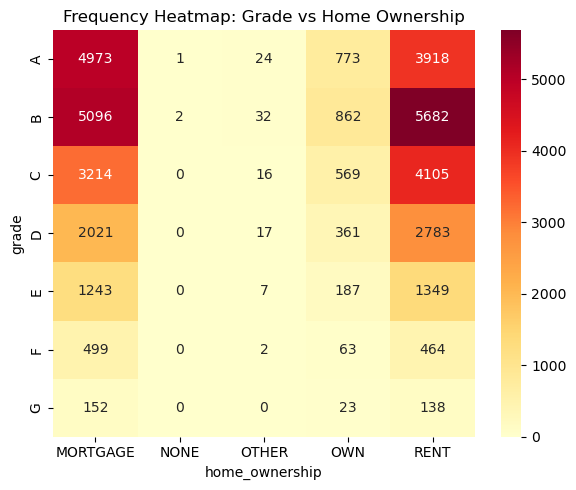

In [48]:
# Plot 4: Cluster Heatmap - Grade vs Home Ownership:

plt.figure(figsize=(6, 5))
cross_tab_grade_home = pd.crosstab(df['grade'], df['home_ownership'])
sns.heatmap(cross_tab_grade_home, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Frequency Heatmap: Grade vs Home Ownership')
plt.tight_layout()
plt.show()

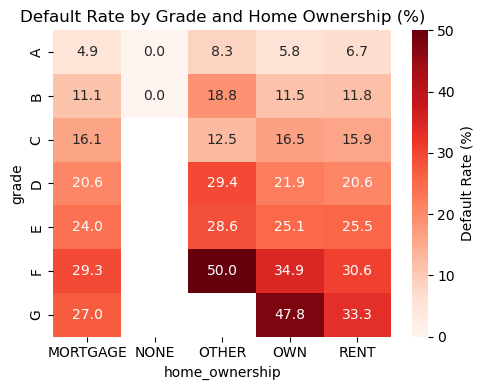

In [49]:
# Plot 5: Three-way relationship - Grade, Home Ownership, Loan Status:

plt.figure(figsize=(5, 4))
three_way = df.groupby(['grade', 'home_ownership'])['loan_status'].apply(
    lambda x: (x == 'Charged Off').mean() * 100
).unstack()

sns.heatmap(three_way, annot=True, fmt='.1f', cmap='Reds', cbar_kws={'label': 'Default Rate (%)'})
plt.title('Default Rate by Grade and Home Ownership (%)')
plt.tight_layout()
plt.show()

In [50]:
df.to_csv('processed_data.csv', index=False)